# Starting with OSMnx: retrieving and visualizing data from OpenStreetMap 

Hello, World! Welcome to my first Python project.  

In this project, we are going to look at [OSMnx](https://osmnx.readthedocs.io/en/stable/), a Python library that allows to download spatial geometries and construct, project, analyze, and visualize street networks using OpenStreetMap data. In addition, there is also a scientific articles available describing the package: 

Boeing, G. 2017. [“OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks.”](https://geoffboeing.com/publications/osmnx-complex-street-networks/) Computers, Environment and Urban Systems 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004

Finally, I'd like to thank *Mr Ujaval Gandhi* from Spatial Thoughts, that encouraged this activity after attending his great course [Python foundation for spatial analysis](https://spatialthoughts.com/courses/python-foundation-for-spatial-analysis/)


### Project Index
- Load the libraries
- Get street network from a place name
- Downloading OSM Geospatial Entities with OSMnx 
- Plotting data
- Save Shapefiles and GeoPackages for GIS 

### Project Resources
- [Spatial Thoughts](https://courses.spatialthoughts.com/python-foundation.html) 
- [OSMnx](https://github.com/gboeing/osmnx)
- [Autogis](https://autogis-site.readthedocs.io/en/latest/notebooks/L6/00_retrieve_osm_data.html)

#### <b> Let's start!

## Load the libraries

In [2]:
# import necessary modules
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt

# command to display matplotlib plots inline within the ipython notebook
%matplotlib inline


## Get street network from a place name

Let's start by specifying the place from where to download the data. For this project, we download data from Crescenzago/Padova district in Milan, Italy. 

Note: the place name should be geocodable. To find the proper name, you can use [Nominatim](https://nominatim.openstreetmap.org/ui/search.html) which is a debugging interface for the search engine used on the OpenStreetMap website. 

Tag: ``"Padova, Municipio 2, Milano, Lombardia, Italia"`` 


In [3]:
# Specify the name that is used to seach for the data 
place_name = "Padova, Municipio 2, Milano, Lombardia, Italia"

### Get street network

OSMnx lets you download street network data and build topologically-corrected street networks, project and plot the networks, and save the street network as geopackage or shapefiles for later use. 

You can specify several different *network types*:
  - 'drive' - get drivable public streets (but not service roads)
  - 'drive_service' - get drivable streets, including service roads
  - 'walk' - get all streets and paths that pedestrians can use (this network type ignores one-way directionality)
  - 'bike' - get all streets and paths that cyclists can use
  - 'all' - download all non-private OSM streets and paths (this is the default network type unless you specify a different one)
  - 'all_private' - download all OSM streets and paths, including private-access ones

Or *simplify* it, which will clean up nodes that are not intersections or dead-ends while retaining the complete edge geometry.

For a more in-depth demonstration of creating street networks, see [OSMnx examples](https://github.com/gboeing/osmnx).

In [4]:
# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name, simplify=True, network_type= 'all_private')

In [5]:
# Check data type of the graph
type(graph)

#DiGraph is a data type that stores nodes and edges with optional data, or attributes.

networkx.classes.multidigraph.MultiDiGraph

In [6]:
#Project graph from its current CRS to UTM.
graph = ox.project_graph(graph)

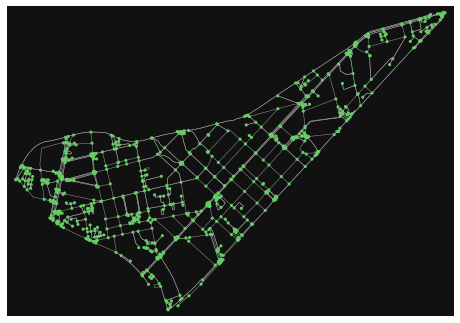

In [7]:
#Plot the graph nodes and edges
fig, ax = ox.plot_graph(graph, edge_linewidth=0.5, node_size=10, node_color="#66cc66")

## Downloading OSM Geospatial Entities with OSMnx

OSMnx lets you download spatial "place boundary" geometries from OpenStreetMap, save them to shapefiles, project them, and plot them. For a more in-depth demonstration of creating these shapefiles, see [OSMnx examples](https://github.com/gboeing/osmnx).

#### Place polygon
Let's also plot the Polygon that represents our area of interest. We can retrieve the polygon geometry using the *geocode_to_gdf()* function

In [8]:
# returns a GeoDataFrame based on the specified place name query
area = ox.geocode_to_gdf(place_name)

In [9]:
# Check the data values
area.head()

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((9.21711 45.50097, 9.21765 45.50050, ...",45.511538,45.492533,9.256124,9.217106,198943950,way,404140221,45.501935,9.230626,"Padova, Municipio 2, Milan, Lombardy, Italy",place,quarter,0.56


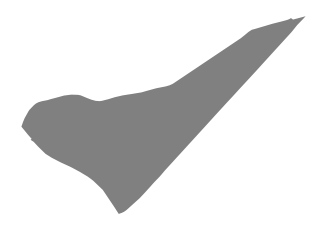

In [10]:
# get the polygon for Padova district, project it to UTM, and plot it
area_proj = ox.project_gdf(area)
ax = area_proj.plot (fc="grey", ec="none")

_ = ax.axis("off")

### Building footprints

It is also possible to download other types of OSM data features with OSMnx such as buildings or points of interest (POIs). Let’s download the buildings with OSMnx *geometries_from_place()* function and plot them.

In [322]:
buildings = ox.geometries_from_place(place_name, tags={'building':True})

In [323]:
# Check how many building footprints we received
len(buildings) 


1442

In [324]:
buildings.head()


addr:city addr:country addr:housenumber  addr:street  \
element_type osmid                                                             
node         9297290741    Milano          NaN               14  Via Rovigno   
way          25666269         NaN          NaN              NaN          NaN   
             25678877         NaN          NaN              NaN          NaN   
             25678878         NaN          NaN              NaN          NaN   
             25678879         NaN          NaN              NaN          NaN   

                                                                  geometry  \
element_type osmid                                                           
node         9297290741                           POINT (9.21947 45.50296)   
way          25666269    POLYGON ((9.23089 45.50315, 9.23096 45.50310, ...   
             25678877    POLYGON ((9.22938 45.49910, 9.22941 45.49897, ...   
             25678878    POLYGON ((9.23009 45.49913, 9.23005 45.49928, ...   
             25678879    POLYGON ((9.23010 45.49931, 9.23006 45.49947, ...   

                        addr:postcode source                  name access  \
element_type osmid                                                          
node         9297290741         20125    NaN  Bocciofila Martesana    NaN   
way          25666269             NaN  UDB60  Anfiteatro Martesana    NaN   
             25678877             NaN    NaN                   NaN    NaN   
             25678878             NaN    NaN                   NaN    NaN   
             25678879             NaN    NaN                   NaN    NaN   

                        amenity  ... height start_date contact:facebook  \
element_type osmid               ...                                      
node         9297290741     NaN  ...    NaN        NaN              NaN   
way          25666269       NaN  ...    NaN        NaN              NaN   
             25678877       NaN  ...    NaN        NaN              NaN   
             25678878       NaN  ...    NaN        NaN              NaN   
             25678879       NaN  ...    NaN        NaN              NaN   

                        contact:instagram contact:linkedin tower:type  \
element_type osmid                                                      
node         9297290741               NaN              NaN        NaN   
way          25666269                 NaN              NaN        NaN   
             25678877                 NaN              NaN        NaN   
             25678878                 NaN              NaN        NaN   
             25678879                 NaN              NaN        NaN   

                        building:use grades ways type  
element_type osmid                                     
node         9297290741          NaN    NaN  NaN  NaN  
way          25666269            NaN    NaN  NaN  NaN  
             25678877            NaN    NaN  NaN  NaN  
             25678878            NaN    NaN  NaN  NaN  
             25678879            NaN    NaN  NaN  NaN  

[5 rows x 71 columns]

In [325]:
buildings.columns

Index(['addr:city', 'addr:country', 'addr:housenumber', 'addr:street',
       'geometry', 'addr:postcode', 'source', 'name', 'access', 'amenity',
       'operator', 'brand', 'brand:wikidata', 'brand:wikipedia', 'tourism',
       'website', 'building', 'leisure', 'sport', 'nodes', 'building:levels',
       'created_by', 'isced:level', 'office', 'roof:levels', 'contact:phone',
       'ref:vatin', 'shop', 'roof:shape', 'email', 'fax', 'phone', 'rooms',
       'stars', 'addr:housename', 'denomination', 'religion', 'wikidata',
       'man_made', 'name:zh', 'air_conditioning', 'opening_hours',
       'payment:cash', 'payment:credit_cards', 'payment:debit_cards',
       'wheelchair', 'abandoned', 'roof:colour', 'building:colour',
       'building:material', 'wikipedia', 'internet_access', 'operator:type',
       'ref:isil', 'old_name', 'cuisine', 'layer', 'ref:mise',
       'outdoor_seating', 'smoking', 'architect', 'height', 'start_date',
       'contact:facebook', 'contact:instagram', 'cont

In [326]:
# project to UTM
buildings_proj= ox.project_gdf(buildings)


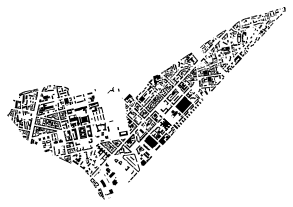

In [327]:
# Plot 
fig, ax = ox.plot_footprints(buildings_proj, figsize=(5, 5), color='black', bgcolor='w')
_ = ax.axis("off")

### Points-of-interest

In [328]:
# Retrieve metro stop
stops = ox.geometries_from_place(place_name, tags={"station": "subway"})

In [329]:
# How many stops do we have?
len(stops)

1

In [330]:
# available colums 
stops.columns

Index(['description', 'name', 'network', 'operator', 'public_transport',
       'railway', 'start_date', 'station', 'wheelchair', 'wikidata',
       'wikipedia', 'geometry'],
      dtype='object')

In [331]:
# Select some useful columns and print
stop_name = ['name', 'description', 'station']
        
# Print
stops[stop_name]

,,name,description,station
element_type,osmid,,,
node,9897478677,Turro,Area STIBM: Mi1,subway


We downloaded Turro subway station from M1 Line.

### Graph to GeoDataFrame

We can now plot all these different OSM layers by using geopandas. However, the street network data is not a GeoDataFrame, but a graph object. 
OSMnx provides the function *graph_to_gdfs()* that can convert the graph into two separate GeoDataFrames where the first one contains the information about the nodes and the second one about the edge.

Let’s extract the nodes and edges from the graph as GeoDataFrames:

In [332]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)


In [333]:
nodes.head()

,y,x,highway,street_count,lon,lat,geometry
osmid,,,,,,,
27551137,5.038073e+06,518401.541084,crossing,4,9.235517,45.495944,POINT (518401.541 5038072.902)
2533539843,5.038070e+06,518398.892171,NaN,3,9.235483,45.495921,POINT (518398.892 5038070.305)
2533541845,5.038103e+06,518415.914145,NaN,3,9.235703,45.496218,POINT (518415.914 5038103.362)
2533542537,5.038074e+06,518413.938024,crossing,4,9.235676,45.495953,POINT (518413.938 5038073.849)
27551139,5.038721e+06,518985.296557,NaN,3,9.243014,45.501765,POINT (518985.297 5038721.309)


In [334]:
edges.head()

osmid       highway  oneway  \
u          v          key                                                 
27551137   2533539843 0                 369654598       footway   False   
           2533541845 0                   8421642  unclassified    True   
           2533542537 0    [369654597, 369654598]       footway   False   
2533539843 2533539844 0                 369654598       footway   False   
           27551137   0                 369654598       footway   False   

                          reversed  length  \
u          v          key                    
27551137   2533539843 0      False   3.706   
           2533541845 0      False  35.300   
           2533542537 0       True  22.011   
2533539843 2533539844 0      False   8.485   
           27551137   0       True   3.706   

                                                                    geometry  \
u          v          key                                                      
27551137   2533539843 0    LINESTRING (518401.541 5038072.902, 518398.892...   
           2533541845 0    LINESTRING (518401.541 5038072.902, 518402.028...   
           2533542537 0    LINESTRING (518401.541 5038072.902, 518410.804...   
2533539843 2533539844 0    LINESTRING (518398.892 5038070.305, 518392.705...   
           27551137   0    LINESTRING (518398.892 5038070.305, 518401.541...   

                                    name maxspeed lanes width junction access  \
u          v          key                                                       
27551137   2533539843 0              NaN      NaN   NaN   NaN      NaN    NaN   
           2533541845 0    Via Palmanova       30   NaN   NaN      NaN    NaN   
           2533542537 0              NaN      NaN   NaN   NaN      NaN    NaN   
2533539843 2533539844 0              NaN      NaN   NaN   NaN      NaN    NaN   
           27551137   0              NaN      NaN   NaN   NaN      NaN    NaN   

                          service bridge tunnel  
u          v          key                        
27551137   2533539843 0       NaN    NaN    NaN  
           2533541845 0       NaN    NaN    NaN  
           2533542537 0       NaN    NaN    NaN  
2533539843 2533539844 0       NaN    NaN    NaN  
           27551137   0       NaN    NaN    NaN

## Plotting data
Let’s create a map of Crescenzago/Padova district using the area, streets and buildings.
We can plot in different ways

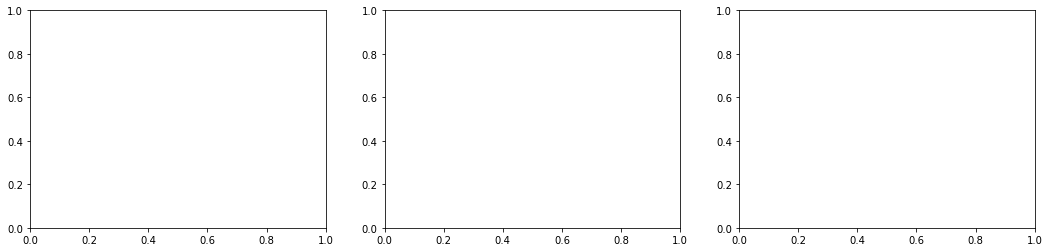

In [335]:
fig, ax = plt.subplots(1, 3, figsize=(18,4))


In [336]:
ax0, ax1, ax2 = ax

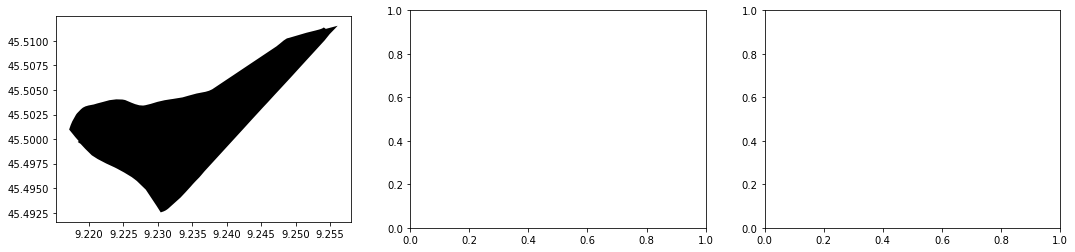

<Figure size 432x288 with 0 Axes>

In [337]:
# Plot the area
area.plot(ax=ax0, facecolor='black')
fig

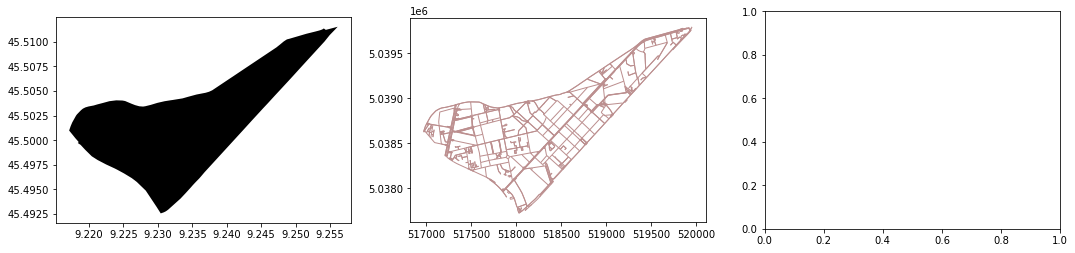

<Figure size 432x288 with 0 Axes>

In [338]:
# Plot the network edges
edges.plot(ax=ax1 ,linewidth=1, edgecolor='#BC8F8F')
fig

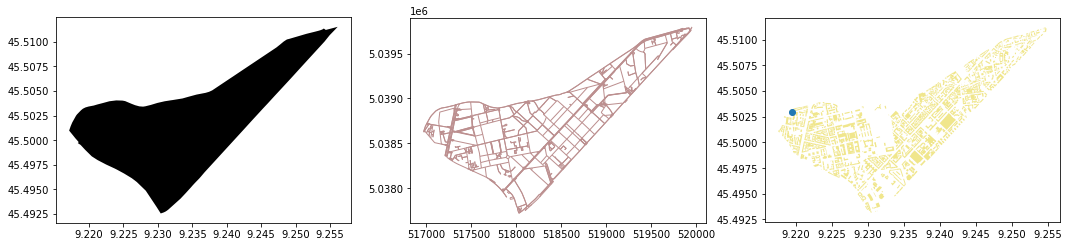

<Figure size 432x288 with 0 Axes>

In [339]:
# Plot the buildings
buildings.plot(ax=ax2, facecolor='khaki')
fig

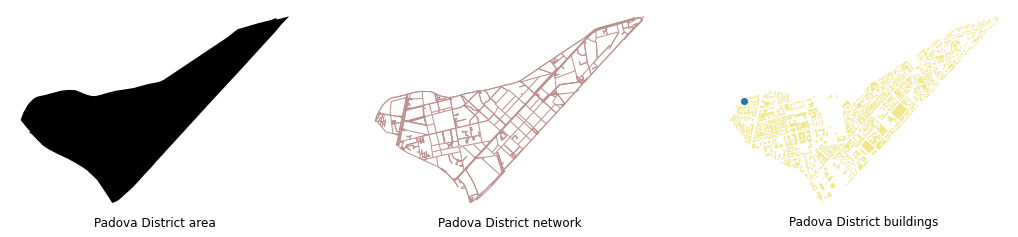

In [340]:
# Remove axis and add titles
ax0.axis('off')
ax0.set_title('Padova District area', y=-0.1)
ax1.axis('off')
ax1.set_title('Padova District network', y=-0.1)
ax2.axis('off')
ax2.set_title('Padova District buildings', y=-0.1)
fig

## Re-project layers to EPSG:32632

In [341]:
from pyproj import CRS

# Set projection
projection = CRS.from_epsg(32632)

# Re-project layers
area = area.to_crs(projection)
edges = edges.to_crs(projection)
buildings = buildings.to_crs(projection)
stops = stops.to_crs(projection)

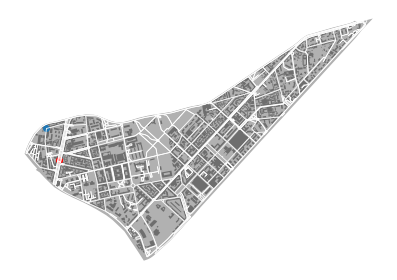

In [342]:
# Create a new plot with the re-projected layers overlapped:
fig, ax = plt.subplots(figsize=(18,4))

ax.axis('off')

# Plot the area
area.plot(ax=ax, facecolor='#b1b1b1')
# plot the network
edges.plot(ax=ax, linewidth=0.8, edgecolor='white')
# plot the buildings
buildings.plot(ax=ax, facecolor='#6e6e6e')
#plot the statio
stops.plot(ax=ax, color='red')
plt.tight_layout()


## Save Shapefiles and GeoPackages for GIS 

Finally, we can export our data in different formats, such as Geopackage, to use in GIS.

In [343]:
# save street network as ESRI shapefile to work with in GIS
ox.save_graph_geopackage(graph, filepath="./data/ graph.gpkg") 

## To Conclude

In this project, we explored a very cool library, OSMnx, which makes working with the OpenStreetMap source very easy. 
Additionally, I suggest you read the [official documentation](https://osmnx.readthedocs.io/en/stable/) to see the library's full functionality.

<b>Thanks!